In [1]:
import pandas as pd
import src.preprocessing as prep
df = pd.read_csv('../data/raw/training_data.csv')

C:\Users\98sul\AppData\Local\Temp\ipykernel_9752\1497002485.py:3: DtypeWarning: Columns (31) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../data/raw/training_data.csv')


In [2]:
df.head()

,adId,price,Kategorie,Erstzulassung,colour,Kilometerstand,Leistung,Kraftstoffart,make,model,...,Schadstoffklasse,Hubraum,Zugr.-lgd. Treibstoffart,Anzahl Sitzplätze,Fahrzeugnummer,Anzahl der Türen,HU,Umweltplakette,Fahrzeugzustand,Einparkhilfe
0,144230675,65000.0,Cabrio / Roadster,5/2008,Silber Metallic,47.959,525,Benzin,Mercedes-Benz,SL 63 AMG,...,Euro4,6.208 cm³,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN
1,145596056,14998.0,Van / Minibus,3/2008,Schwarz Metallic,211.300,224,Diesel,Mercedes-Benz,R 320,...,Euro4,2.987 cm³,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN
2,146126562,15900.0,Sportwagen / Coupé,6/2002,Gold Metallic,84.876,306,Benzin,Mercedes-Benz,CL 500,...,Euro4,4.966 cm³,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN
3,149311358,24950.0,Limousine,1/2003,Silber Metallic,148.000,500,"Benzin, E10-geeignet",Mercedes-Benz,S 55,...,Euro4,5.439 cm³,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN
4,171895600,29990.0,"Kombi, Vorführfahrzeug",11/2012,Grau Metallic,89.000,204,Hybrid (Diesel / Elektro),Mercedes-Benz,E 300,...,Euro5,2.143 cm³,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN


<Axes: >

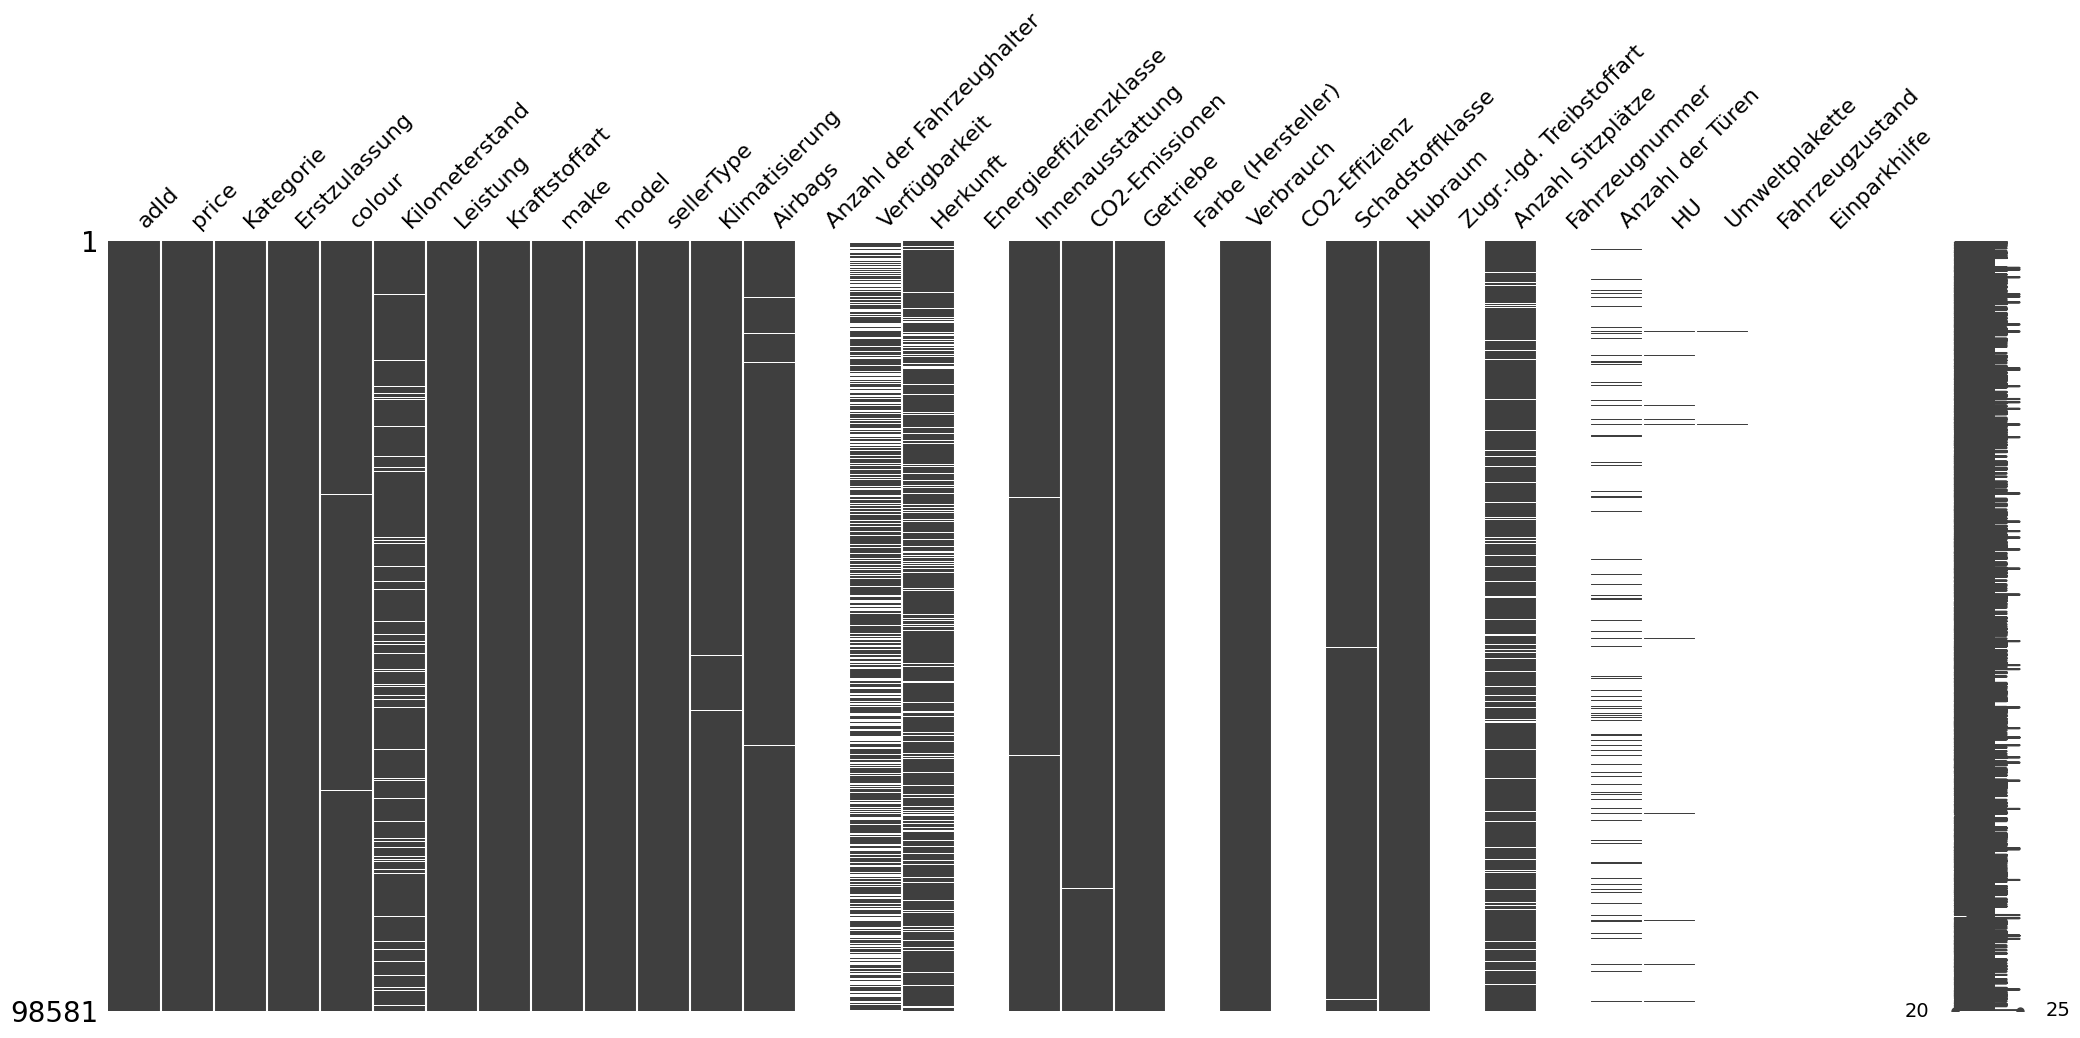

In [3]:
import missingno as msno
msno.matrix(df)

In [4]:
spalten_list = df.columns.tolist()
print(spalten_list)

['adId', 'price', 'Kategorie', 'Erstzulassung', 'colour', 'Kilometerstand', 'Leistung', 'Kraftstoffart', 'make', 'model', 'sellerType', 'Klimatisierung', 'Airbags', 'Anzahl der Fahrzeughalter', 'Verfügbarkeit', 'Herkunft', 'Energieeffizienzklasse', 'Innenausstattung', 'CO2-Emissionen', 'Getriebe', 'Farbe (Hersteller)', 'Verbrauch', 'CO2-Effizienz', 'Schadstoffklasse', 'Hubraum', 'Zugr.-lgd. Treibstoffart', 'Anzahl Sitzplätze', 'Fahrzeugnummer', 'Anzahl der Türen', 'HU', 'Umweltplakette', 'Fahrzeugzustand', 'Einparkhilfe']


In [5]:
print(df["sellerType"].unique())
print(df["Anzahl der Türen"].isna().sum())
missing_seats_before = df["Anzahl Sitzplätze"].isna().sum()


['DEALER']
85991


In [6]:
# Drop columns with only null values or a single constant value
# These columns either contain only nulls or provide no variance (e.g., only one unique value)
cols_to_drop = ["Einparkhilfe", "Fahrzeugzustand", "Umweltplakette", "HU", "Fahrzeugnummer",
                "Zugr.-lgd. Treibstoffart", "CO2-Effizienz", "Farbe (Hersteller)",
                "Energieeffizienzklasse", "Anzahl der Fahrzeughalter", "sellerType","Anzahl der Türen"]  # only contains 'DEALER' und Anzahl der Türen hat  85911 nan Werte
df.drop(cols_to_drop, axis=1, inplace=True)

In [7]:
df = prep.preprocess_dataframe(df)

C:\Users\98sul\Car-Price-Prediction\src\preprocessing.py:88: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  .transform(lambda x: x.fillna(x.mode().iloc[0] if not x.mode().empty else np.nan))
C:\Users\98sul\Car-Price-Prediction\src\preprocessing.py:88: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  .transform(lambda x: x.fillna(x.mode().iloc[0] if not x.mode().empty else np.nan))
C:\Users\98sul\Car-Price-Prediction\src\preprocessing.py:88: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future ver

NameError: name 'prep' is not defined

<Axes: >

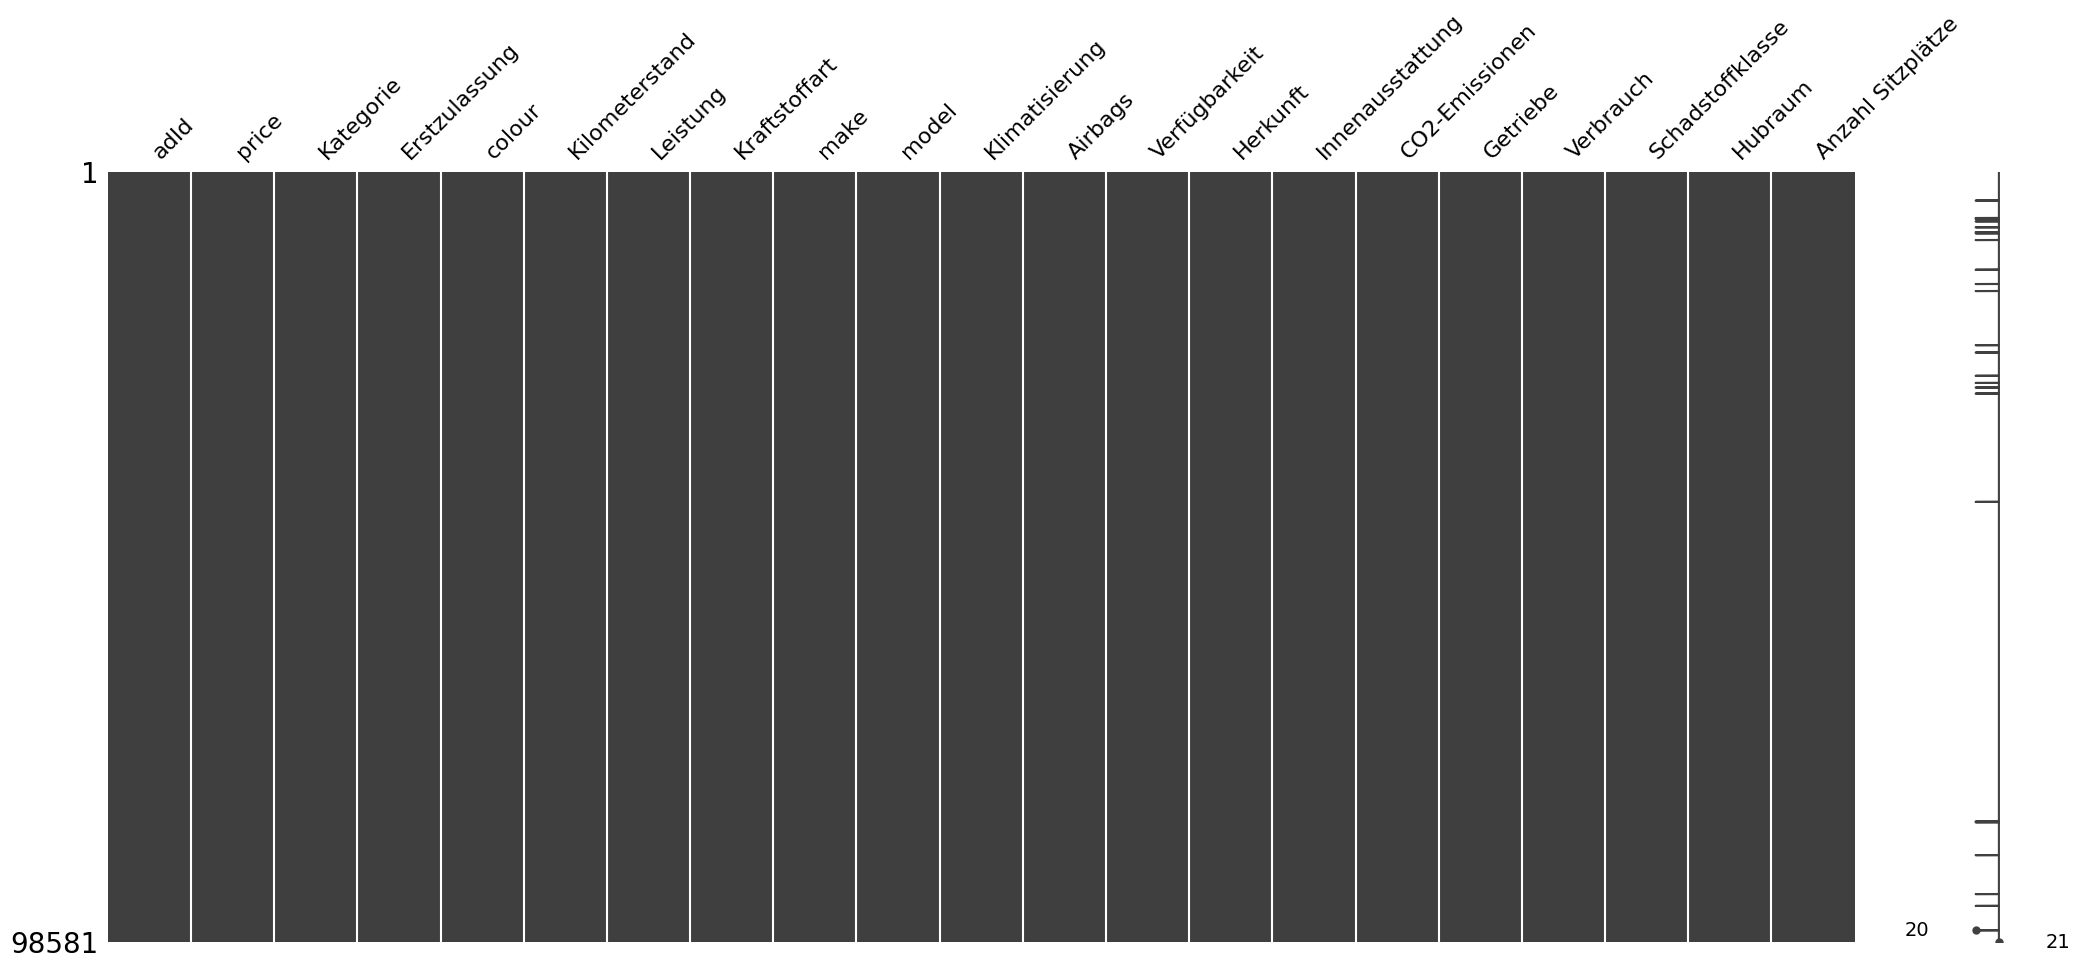

In [9]:
msno.matrix(df)

In [10]:

print(df["CO2-Emissionen"].isna().sum())

0


In [11]:
print((df["CO2-Emissionen"] == "missing").sum())

1


In [ ]:
print(df["Airbags"].unique())

In [ ]:
print(missing_seats_before)
print((df["Anzahl Sitzplätze"] == 0).sum())
# [2.0 5.0 4.0 7.0 'missing' 6.0 3.0 8.0 9.0 10.0 1.0 17.0 67.0]

In [ ]:
spalten_list = df.columns.tolist()
print(spalten_list)

In [ ]:
# CO2-Emissionen, Verbrauch

In [ ]:
print(df["Hubraum"])

In [ ]:
df.info()

In [ ]:
df = prep.fill_missing_categories(df,"Verfügbarkeit","missing")

In [ ]:
prep.anova_test(df,"Verfügbarkeit","price")

In [13]:
prep.cramers_v(df["make"], df["Herkunft"])

Cramér's V Result:
Ergebnis von Cramér's V:
Cramér's V: 0.2752


np.float64(0.27523362156661996)

In [8]:
prep.calculate_mutual_info_regression(df, target_column="price")


📊 Mutual Information (Regression):
          Feature  MI Score
            model  0.959194
        Verbrauch  0.828640
         Leistung  0.751077
          Hubraum  0.712056
   CO2-Emissionen  0.591255
    Erstzulassung  0.421704
   Kilometerstand  0.352703
        Kategorie  0.351480
             make  0.314621
 Schadstoffklasse  0.282140
             adId  0.228005
 Innenausstattung  0.224626
         Getriebe  0.188304
Anzahl Sitzplätze  0.091846
    Kraftstoffart  0.088123
         Herkunft  0.084295
           colour  0.084135
   Klimatisierung  0.081552
    Verfügbarkeit  0.073917
          Airbags  0.034120


,Feature,MI Score
8,model,0.959194
16,Verbrauch,0.828640
5,Leistung,0.751077
18,Hubraum,0.712056
14,CO2-Emissionen,0.591255
2,Erstzulassung,0.421704
4,Kilometerstand,0.352703
1,Kategorie,0.351480
7,make,0.314621
17,Schadstoffklasse,0.282140


In [17]:
print(df.isnull().sum())

adId                 0
price                0
Kategorie            0
Erstzulassung        0
colour               0
Kilometerstand       0
Leistung             0
Kraftstoffart        0
make                 0
model                0
Klimatisierung       0
Airbags              0
Verfügbarkeit        0
Herkunft             0
Innenausstattung     0
CO2-Emissionen       0
Getriebe             0
Verbrauch            0
Schadstoffklasse     0
Hubraum              0
Anzahl Sitzplätze    0
dtype: int64
